In [62]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

X = pd.read_csv( 'protein.csv' ) 
X = X.drop(['ID'], axis=1)
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(X)

In [86]:
X=pd.DataFrame(X)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X= scaler.fit_transform(X)
#X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909
5,-1.296844,-0.196513,0.744772,2.031446,2.638639,-1.803137,-0.783545,-1.434261,1.042819,0.277629
6,-1.066044,-0.295787,-0.039613,2.486801,3.054413,-0.431335,-1.230214,-1.250842,0.810319,-0.838451
...,...,...,...,...,...,...,...,...,...,...
470,-0.678148,1.778802,-1.258955,-2.678311,-0.040818,-0.718702,-0.886245,1.070218,-0.546501,-0.119334
473,0.811216,0.367455,-1.165994,1.569535,2.543085,-0.795273,-1.684104,0.670535,-1.073589,-0.005435
474,0.737130,0.040366,0.675858,-2.953505,-1.438371,-3.816273,-0.227802,-1.668164,0.372593,-0.263180
478,-2.763997,4.457392,-1.115640,-3.507782,-3.701657,-1.655353,4.066961,-0.507851,-0.924245,-1.357475


In [87]:
from scipy import stats
z = pd.DataFrame(stats.zscore(X, axis=1, ddof=1))
indexNames = z[  (np.abs(z[0])>2) | (np.abs(z[1])>2) | (np.abs(z[2])>2) | (np.abs(z[3])>2) | (np.abs(z[4]) >2) | (np.abs(z[5])>2) | (np.abs(z[6])>2) | (np.abs(z[7])>2) | (np.abs(z[8])>2) | (np.abs(z[9])>2) ].index #, z[1]>2, z[2]>2, z[3]>2 , z[4] >2 , z[5]>2 , z[6]>2 , z[7]>2 , z[8]>2 , z[9]>2
indexNames

Int64Index([], dtype='int64')

In [88]:
X = X.drop(indexNames )

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.array(X[8])
y = np.array(X[4])


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

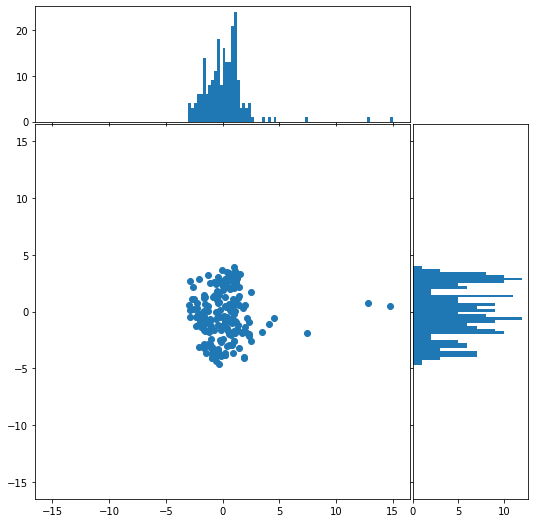

In [96]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()